In [1]:
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 36})
rc('text', usetex=True)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [3]:
plt.rcParams.update({'font.size': 45})

In [4]:
def f(x):
    x1, x2 = x
    return 0.02*x1*x1 + 0.005*x2*x2

In [5]:
import math
def L2(x):
    x1, x2 = x
    return math.sqrt(x1*x1 + x2*x2)

In [6]:
def grad1(x1):
    return 0.04*x1

In [7]:
def grad2(x2):
    return 0.01*x2

In [8]:
def grad(x):
    x1, x2 = x
    grad = np.array([0.04*x1, 0.01*x2])
    return grad

In [9]:
def hessian(x):
    hessian = np.array([[0.04, 0], [0, 0.01]])
    return hessian

In [10]:
time = int(300)
dpi=100
mu = 0.001
sqmu= math.sqrt(mu)
s = (1-math.exp(-sqmu))*(1-math.exp(-sqmu))/mu
a = (1-math.exp(-sqmu))/(2-math.exp(-sqmu))
b = math.exp(-sqmu)/(2-math.exp(-sqmu))

In [11]:
#Calculate Nesterov's method
def Nesterov(time=time):
    Nes = np.zeros((time+1,2))
    Nes[0] = [1, 1]
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* (1-sqmu) / (1+sqmu)
        Nes[k+1] = y -   grad(y)
    return Nes

In [12]:
Nes = Nesterov()

In [13]:
def Wilson(p,t):
    x1, x2, dx1, dx2 = p
    dpdt = [dx1, dx2, -2*sqmu*dx1-grad1(x1) , -2*sqmu*dx2-grad2(x2)]
    return dpdt

In [14]:
p0 = [1,1,0,0]

In [15]:
t = np.linspace(0, time, time+1)

In [16]:
t2 = np.linspace(0, time, time*100+1)

In [17]:
sol1 = odeint(Wilson, p0, t2)

In [18]:
def ODE_SC_h(p,t,h=1):
    x1, x2, dx1, dx2 = p
    dpdt = [dx1, dx2, -(2-a)*sqmu*dx1-grad1(x1+a*dx1/sqmu) , -(2-a)*sqmu*dx2-grad2(x2+a*dx2/sqmu)]
    return dpdt

In [19]:
import functools
ODE_SC=functools.partial(ODE_SC_h, h=1)
sol2 = odeint(ODE_SC, p0, t2)

In [20]:
def Shi(p,t):
    x1, x2, dx1, dx2 = p
    dpdt = [dx1, dx2, -(2*sqmu+0.04)*dx1-(1+sqmu)*grad1(x1) , -(2*sqmu+0.01)*dx2-(1+sqmu)*grad2(x2)]
    return dpdt

In [21]:
sol3 = odeint(Shi, p0, t2)

In [22]:
#Calculate Nesterov's method
def Nesterov2(time=time):
    Nes = np.zeros((time+1,2))
    Nes[0] = [1, 1]
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* b
        Nes[k+1] = y -  s * grad(y)
    return Nes
Nes2 = Nesterov2()

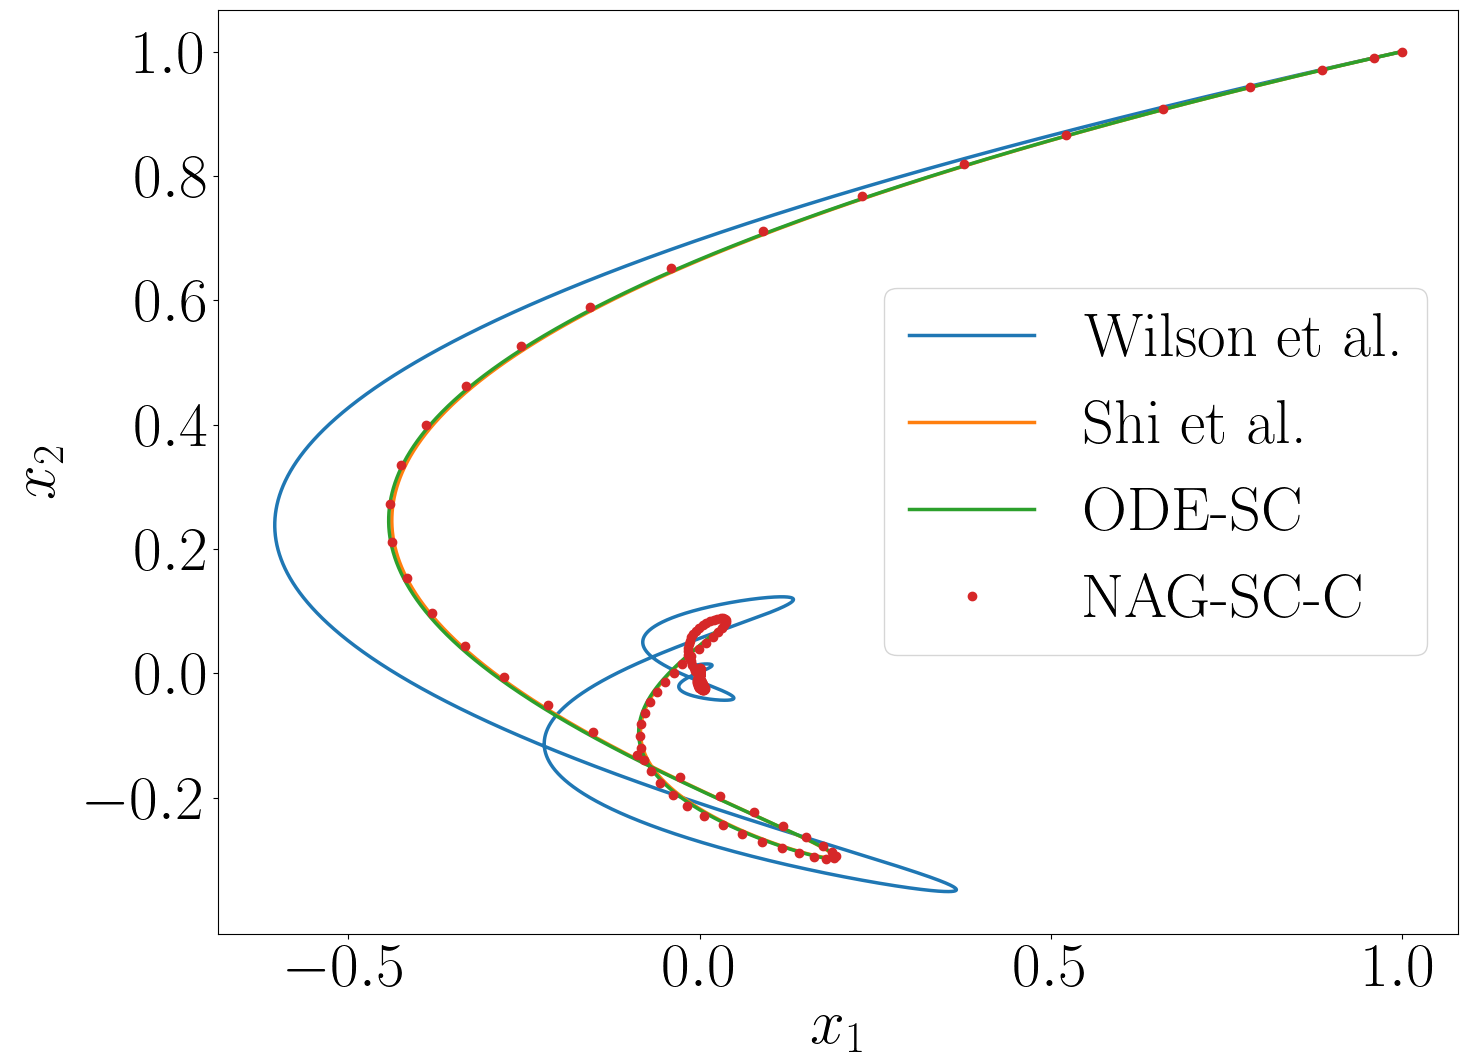

In [23]:
#@title
plt.figure(figsize=(16,12))

plt.plot(sol1[:,0], sol1[:,1], label='Wilson et al.', linewidth=2.5)

plt.plot(sol3[:,0], sol3[:,1], label='Shi et al.', linewidth=2.5)
plt.plot(sol2[:,0], sol2[:,1], label='ODE-SC', linewidth=2.5)
plt.plot(Nes[:,0], Nes[:,1], '.', label="NAG-SC-C", markersize=12)

plt.xlabel('$x_1$', labelpad=0)
plt.ylabel('$x_2$', labelpad=15)
plt.yticks([-0.2, 0.0,0.2,0.4,0.6,0.8,1.0])
plt.legend()
plt.savefig('Wilson-Shi-Tra-SC-C.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()

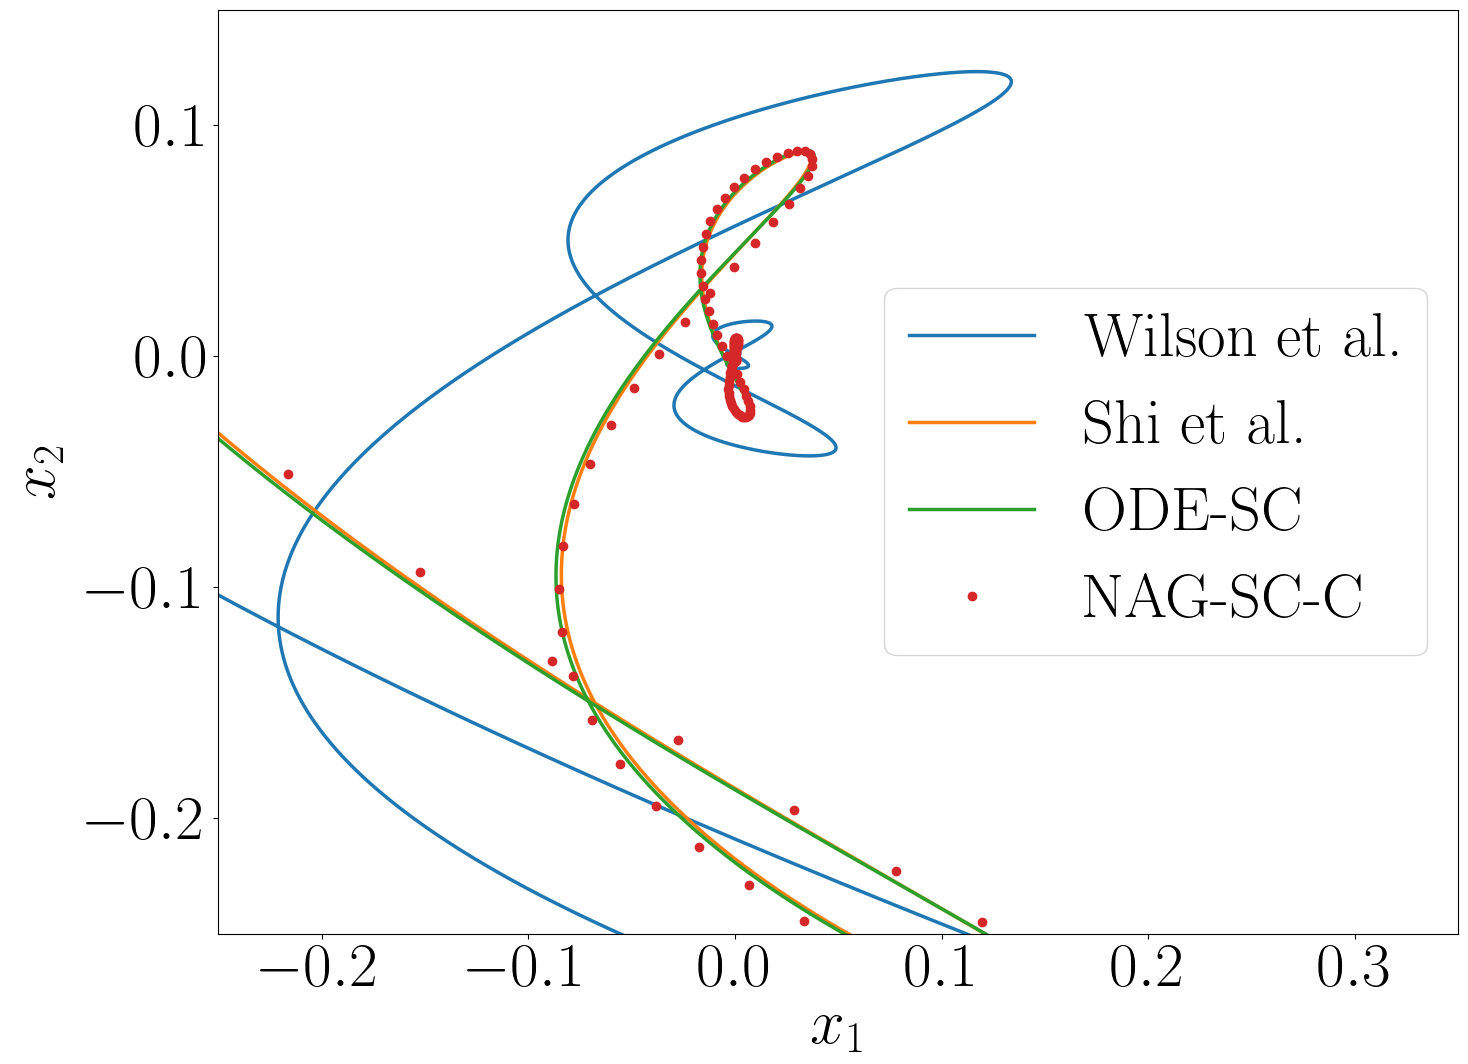

In [24]:
plt.figure(figsize=(16,12))
plt.plot(sol1[:,0], sol1[:,1], label='Wilson et al.', linewidth=2.5)

plt.plot(sol3[:,0], sol3[:,1], label='Shi et al.', linewidth=2.5)
plt.plot(sol2[:,0], sol2[:,1], label='ODE-SC', linewidth=2.5)
plt.plot(Nes[:,0], Nes[:,1], '.', label="NAG-SC-C", markersize=12)
plt.xlabel('$x_1$', labelpad=0)
plt.ylabel('$x_2$', labelpad=15)
plt.xlim(-0.25, 0.35)
#plt.xticks([  -0.05, 0, 0.05])
plt.ylim(-0.25, 0.15)
#plt.yticks([-0.2, -0.1, 0, 0.1, 0.2])
plt.legend()
plt.savefig('Wilson-Shi-ZTr-SC-C.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [25]:
sol_func = np.apply_along_axis(f, 1,  sol1[:,:2])
sol2_func = np.apply_along_axis(f, 1, sol2[:,:2])
sol3_func = np.apply_along_axis(f, 1, sol3[:,:2])
Nes_func = np.apply_along_axis(f, 1, Nes)
Nes2_func = np.apply_along_axis(f, 1, Nes2)

In [26]:
sol2h = sol2[:,:2][np.arange(0,len(sol2[:,:2]),100)]
sol3h = sol3[:,:2][np.arange(0,len(sol3[:,:2]),100)]

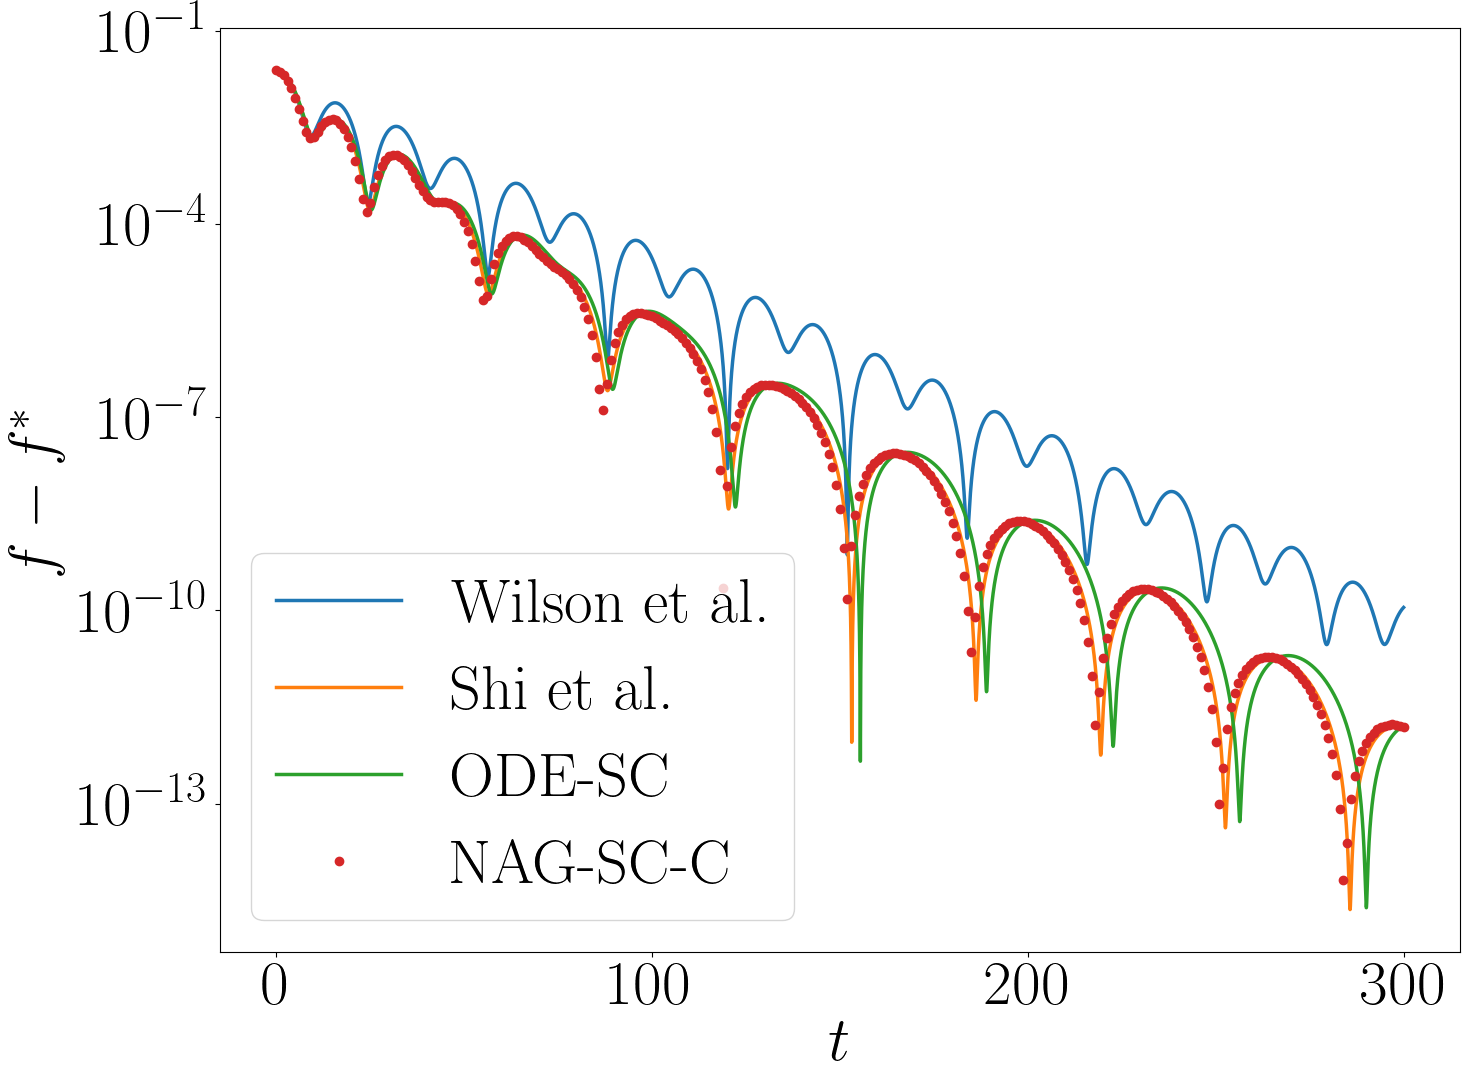

In [27]:
plt.figure(figsize=(16,12))
plt.plot(t2, sol_func, label='Wilson et al.', linewidth=2.5)

plt.plot(t2, sol3_func, label='Shi et al.', linewidth=2.5)
plt.plot(t2, sol2_func, label='ODE-SC', linewidth=2.5)
plt.plot(t, Nes_func, '.', label="NAG-SC-C", markersize=12)
plt.xlabel('$t$', labelpad=0)
plt.ylabel('$f-f^*$', labelpad=10)
plt.yscale('log')
plt.legend()
plt.savefig('Wilson-Shi-Errors-SC-C.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()

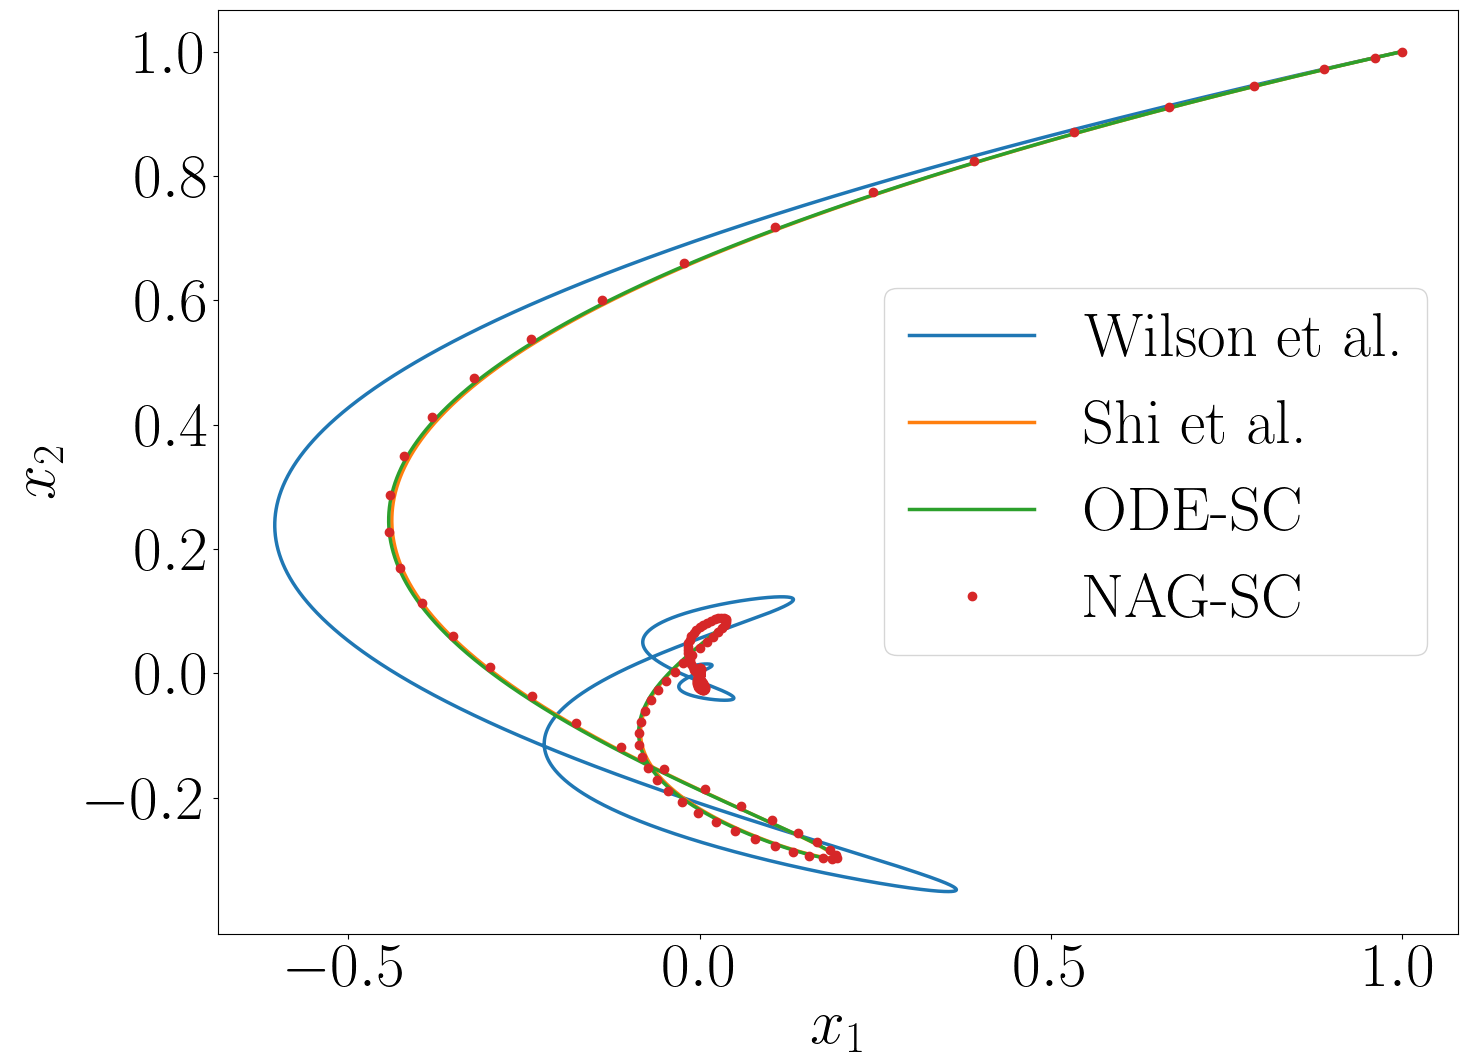

In [28]:
#@title
plt.figure(figsize=(16,12))
plt.plot(sol1[:,0], sol1[:,1], label='Wilson et al.', linewidth=2.5)
plt.plot(sol3[:,0], sol3[:,1], label='Shi et al.', linewidth=2.5)
plt.plot(sol2[:,0], sol2[:,1], label='ODE-SC', linewidth=2.5)

plt.plot(Nes2[:,0], Nes2[:,1], '.', label="NAG-SC", markersize=12)
plt.xlabel('$x_1$', labelpad=0)
plt.ylabel('$x_2$', labelpad=15)
plt.yticks([-0.2, 0.0,0.2,0.4,0.6,0.8,1.0])
plt.legend()
plt.savefig('Wilson-Shi-Tra-SC.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()

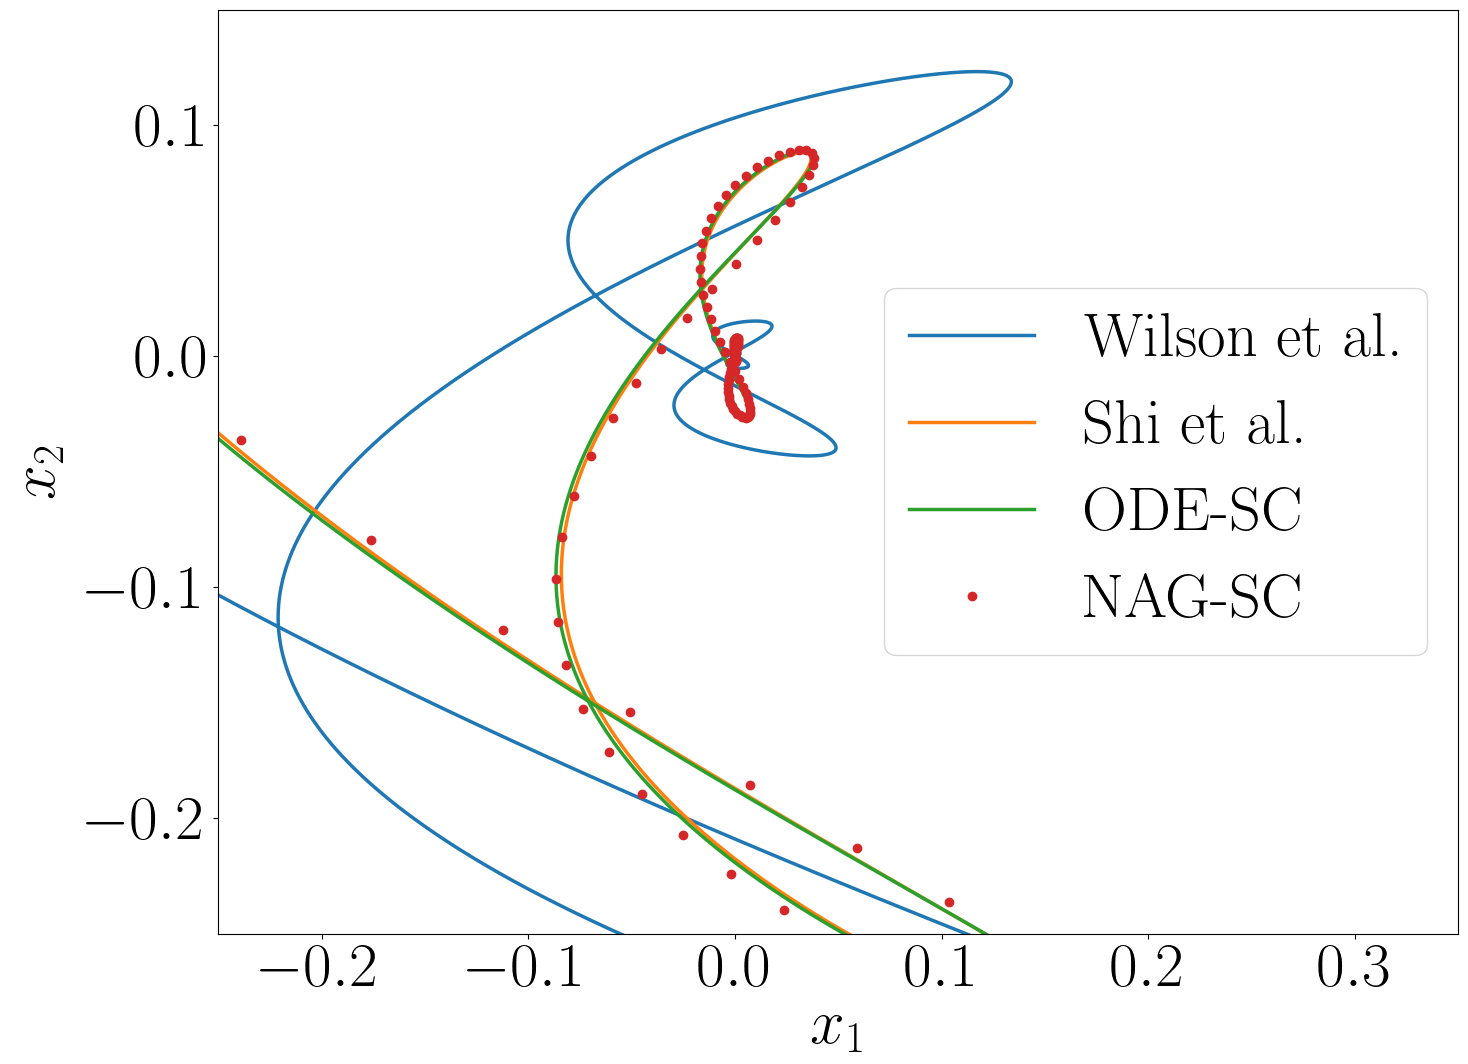

In [29]:
plt.figure(figsize=(16,12))
plt.plot(sol1[:,0], sol1[:,1], label='Wilson et al.', linewidth=2.5)
plt.plot(sol3[:,0], sol3[:,1], label='Shi et al.', linewidth=2.5)
plt.plot(sol2[:,0], sol2[:,1], label='ODE-SC', linewidth=2.5)

plt.plot(Nes2[:,0], Nes2[:,1], '.', label="NAG-SC", markersize=12)
plt.xlabel('$x_1$', labelpad=0)
plt.ylabel('$x_2$', labelpad=15)
plt.xlim(-0.25, 0.35)
#plt.xticks([  -0.05, 0, 0.05])
plt.ylim(-0.25, 0.15)
#plt.yticks([-0.2, -0.1, 0, 0.1, 0.2])
plt.legend()
plt.savefig('Wilson-Shi-ZTr-SC.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()

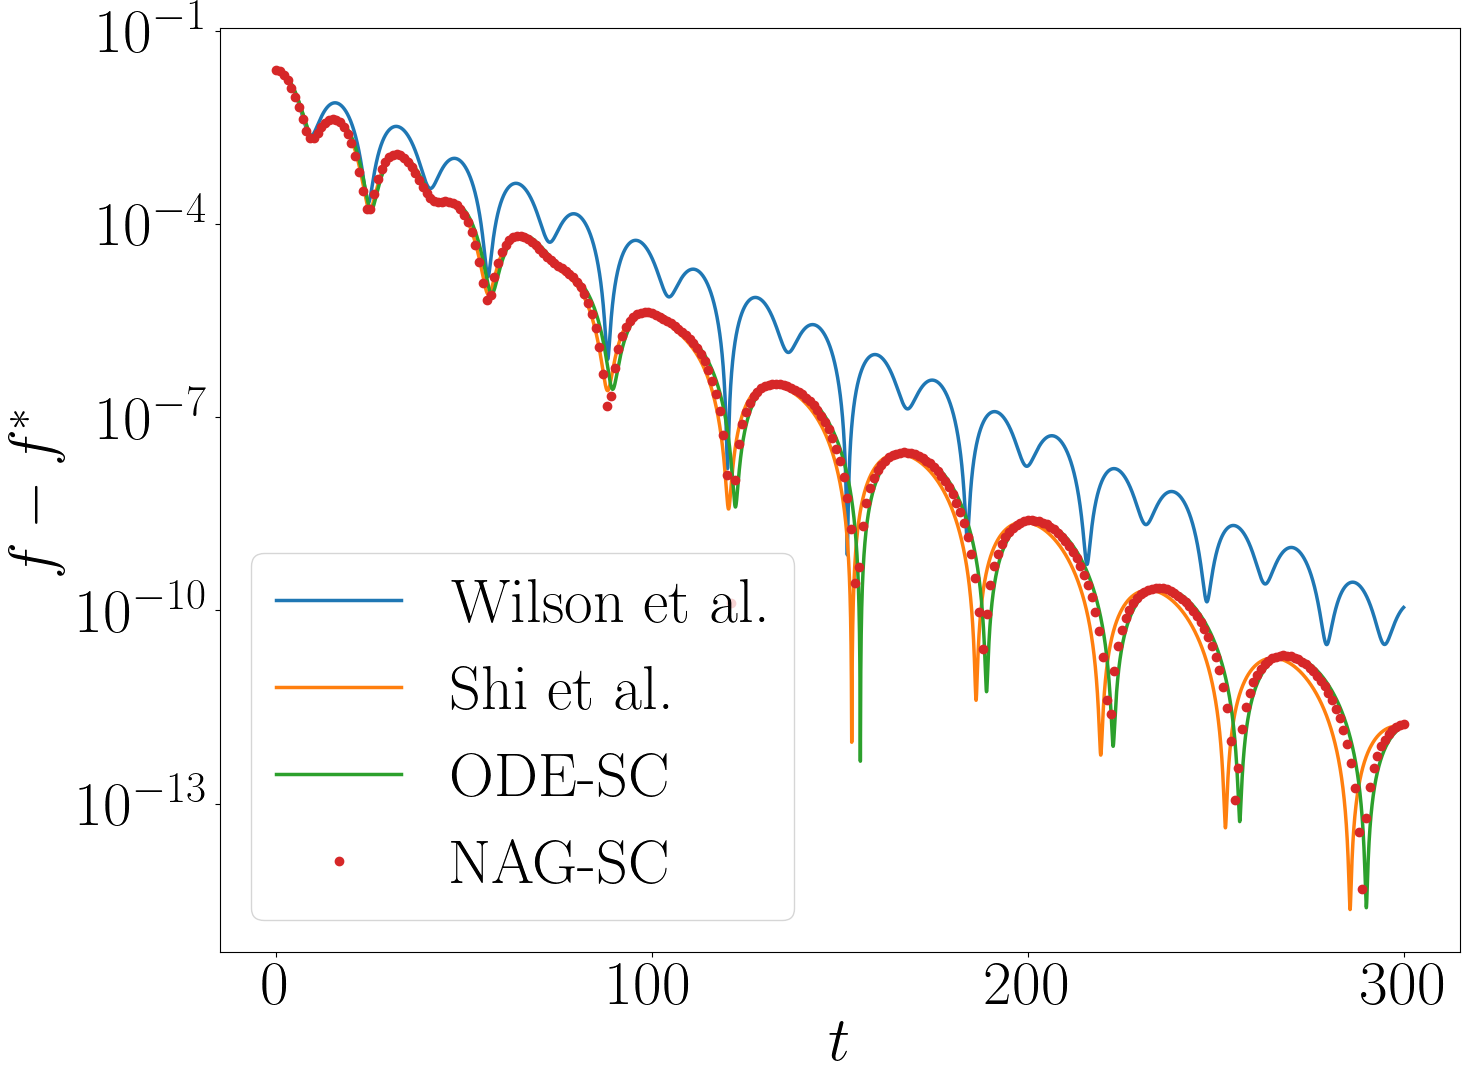

In [30]:
plt.figure(figsize=(16,12))
plt.plot(t2, sol_func, label='Wilson et al.', linewidth=2.5)
plt.plot(t2, sol3_func, label='Shi et al.', linewidth=2.5)
plt.plot(t2, sol2_func, label='ODE-SC', linewidth=2.5)

plt.plot(t, Nes2_func, '.', label="NAG-SC", markersize=12)
plt.xlabel('$t$', labelpad=0)
plt.ylabel('$f-f^*$', labelpad=10)
plt.yscale('log')
plt.legend()
plt.savefig('Wilson-Shi-Errors-SC.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [31]:
L2_ODE_Nes = np.apply_along_axis(L2, 1, sol2h[:,:2]-Nes)
L2_shi_Nes = np.apply_along_axis(L2, 1, sol3h[:,:2]-Nes)
L2_ODE_Nes2 = np.apply_along_axis(L2, 1, sol2h[:,:2]-Nes2)
L2_shi_Nes2 = np.apply_along_axis(L2, 1, sol3h[:,:2]-Nes2)

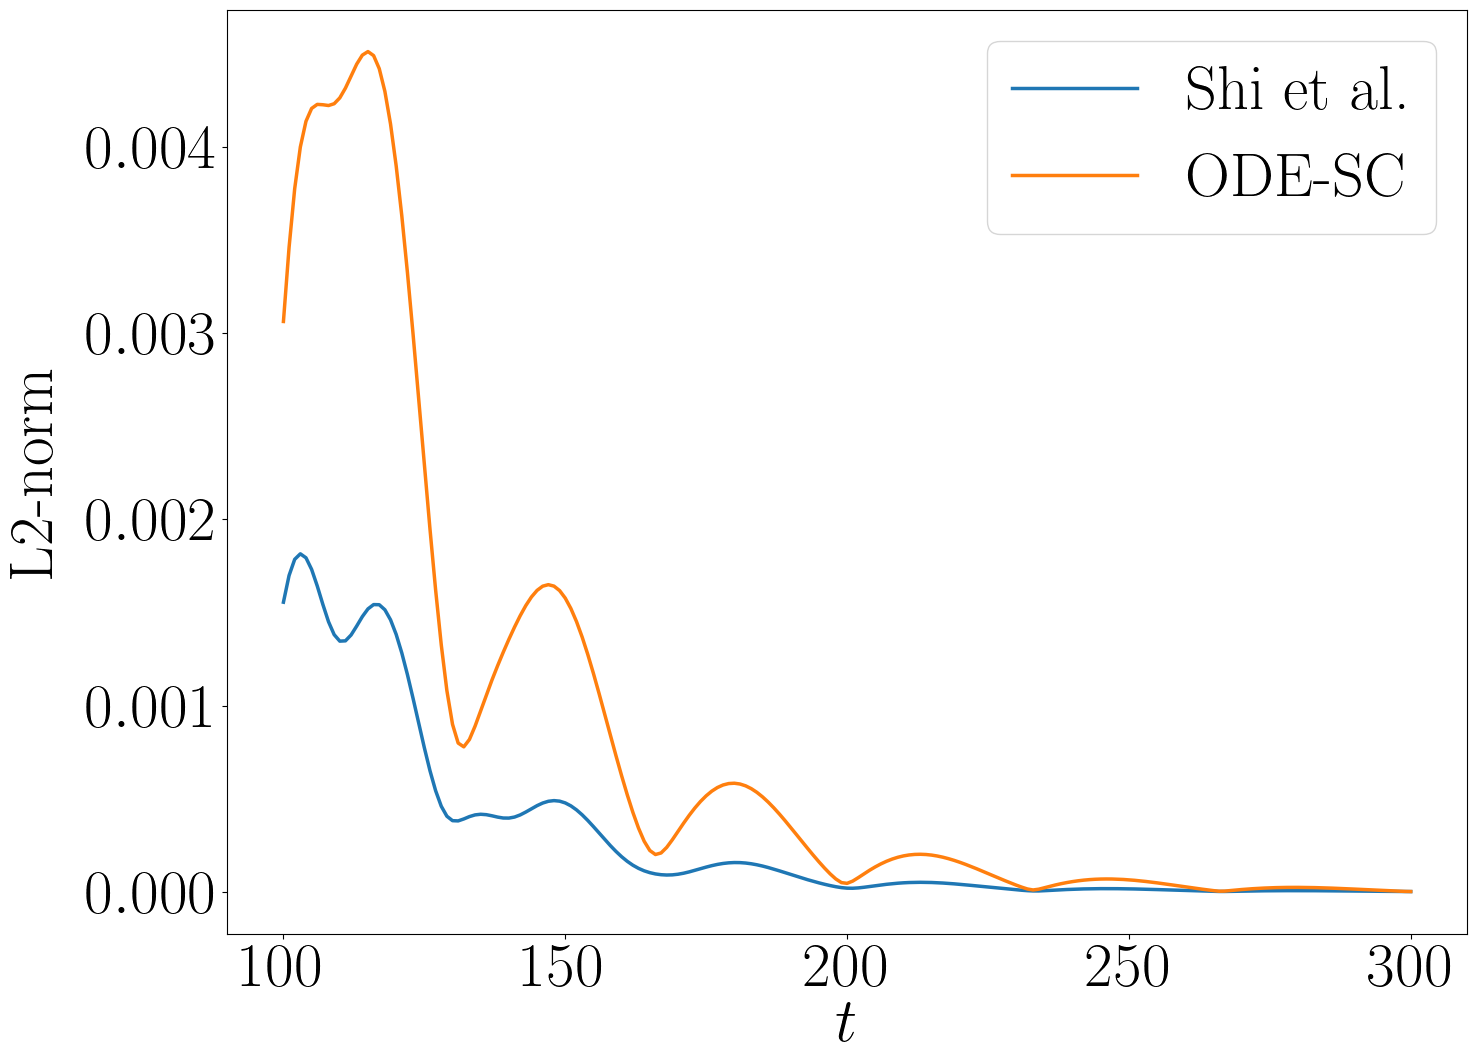

In [32]:
plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(16,12))
plt.plot(t[100:], L2_shi_Nes[100:], label='Shi et al.', linewidth=2.5)
plt.plot(t[100:], L2_ODE_Nes[100:], label='ODE-SC', linewidth=2.5)

plt.xlabel('$t$', labelpad=0)
plt.ylabel('L2-norm', labelpad=15)
plt.legend()
plt.savefig('Shi-L2-SC-C.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()

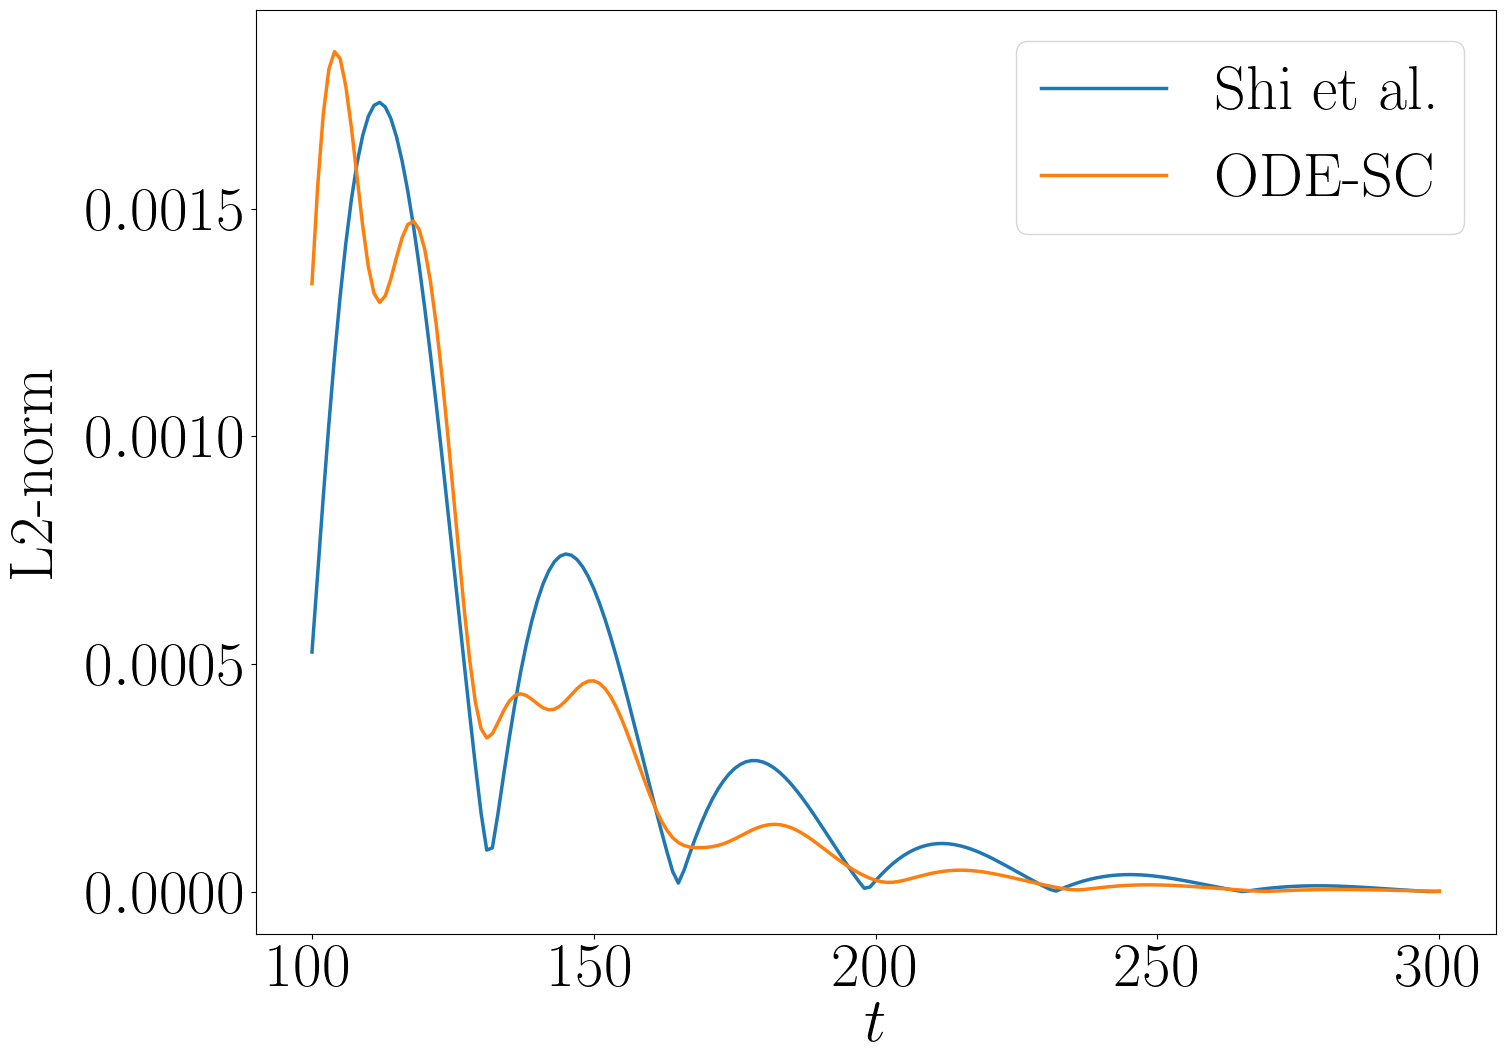

In [33]:
plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(16,12))
plt.plot(t[100:], L2_shi_Nes2[100:], label='Shi et al.', linewidth=2.5)
plt.plot(t[100:], L2_ODE_Nes2[100:], label='ODE-SC', linewidth=2.5)

plt.xlabel('$t$', labelpad=0)
plt.ylabel('L2-norm', labelpad=15)
plt.legend()
plt.savefig('Shi-L2-SC.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()